# Regression Tree Classifiers

In [1]:
from sklearn.datasets import load_iris
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import graphviz
import numpy as np

In [2]:
iris = load_iris()
iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [22]:
x = iris.data[:, [0,2]]
y = iris.target

In [23]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=.4,
                                                     random_state=42)

In [24]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

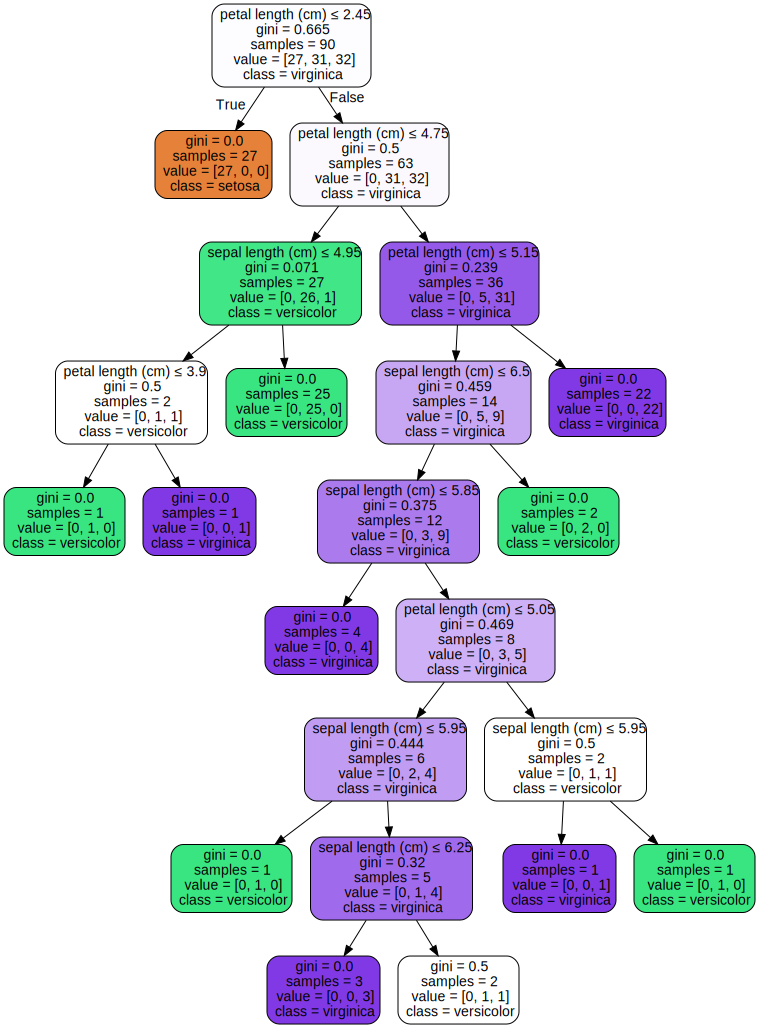

In [25]:
dot_data = tree.export_graphviz(tree_clf,
                                feature_names=np.array(iris.feature_names)[[0,2]],
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

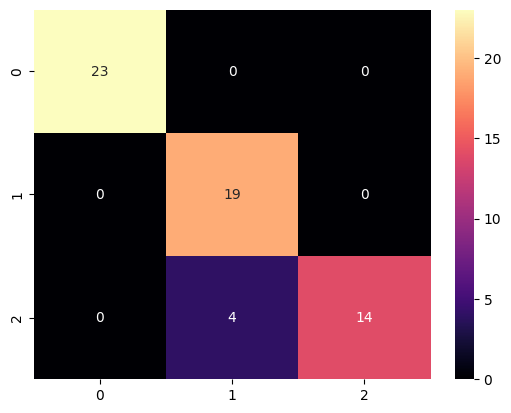

In [9]:
y_pred = tree_clf.predict(x_test)

mc = confusion_matrix(y_test, y_pred)

import seaborn as sns

mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

Acurácia: 0.9333333333333333


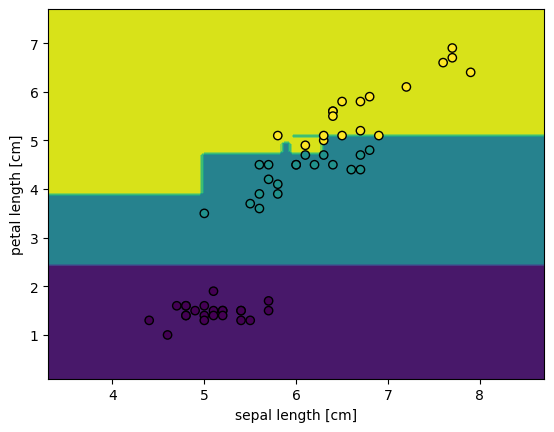

In [13]:
from sklearn.inspection import DecisionBoundaryDisplay

disp = DecisionBoundaryDisplay.from_estimator(tree_clf,x_train,
                                              response_method="predict",
                                              xlabel="sepal length [cm]",
                                              ylabel="petal length [cm]")
disp.ax_.scatter(x_test[:, 0],x_test[:, 1],c=y_test,edgecolor="k")
print("Acurácia:",accuracy_score(y_test,y_pred))

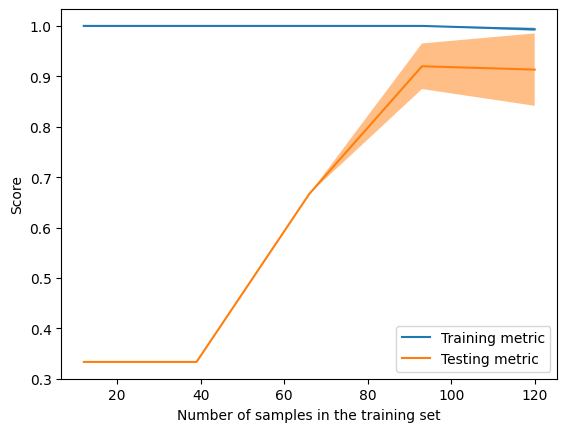

In [14]:
from sklearn.model_selection import LearningCurveDisplay

LearningCurveDisplay.from_estimator(tree_clf,X=x,y=y,score_type="both")

## Utilizando todas as features

In [28]:
x = iris.data[:, :]
y = iris.target

In [29]:
x_train, x_test, y_train, y_test, = train_test_split(x, y, test_size=.2,
                                                     random_state=42)

In [30]:
tree_clf = tree.DecisionTreeClassifier()
tree_clf.fit(x_train, y_train)

DecisionTreeClassifier()

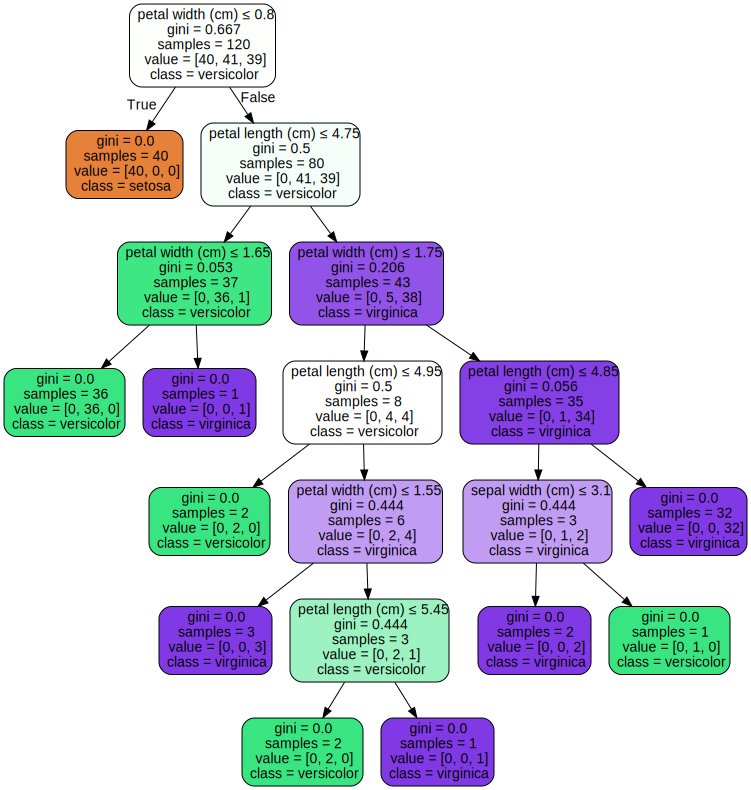

In [31]:
dot_data = tree.export_graphviz(tree_clf,
                                feature_names=np.array(iris.feature_names),
                                class_names=iris.target_names,
                                filled=True,
                                rounded=True,
                                special_characters=True)

graph = graphviz.Source(dot_data)
graph

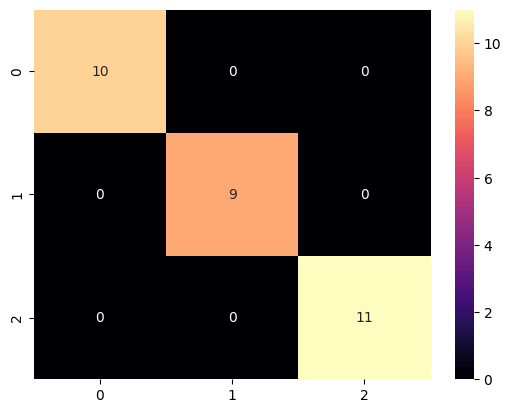

In [32]:
y_pred = tree_clf.predict(x_test)

mc = confusion_matrix(y_test, y_pred)
mc_heatmap = sns.heatmap(mc, cmap="magma", annot=True)

Acurácia: 1.0


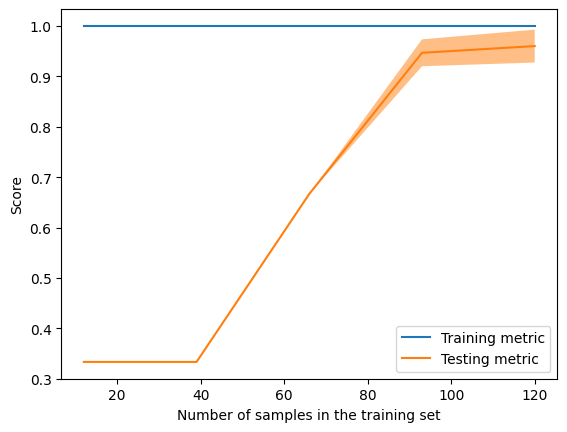

In [33]:
print("Acurácia:",accuracy_score(y_test,y_pred))
LearningCurveDisplay.from_estimator(tree_clf,X=x,y=y,score_type="both")

In [34]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']